# **Library Imports**

In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8ef276aabd9ecc8659fe3d7bff3a7b677f480592c32ba7898c327a6550ef5fa8
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import shap
import lime
import lime.lime_tabular

sns.set(style='whitegrid')
%matplotlib inline

# **Task 1: Exploratory Data Analysis**

**Load the Dataset**

In [3]:
# Load the dataset
df = pd.read_csv('lung_disease_v1.csv')

# Display basic info to see what we're working with
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nData Types:\n", df.dtypes)

Dataset Shape: (12000, 33)

Columns: ['patient_id', 'age', 'sex', 'bmi', 'smoking_status', 'pack_years', 'pm25_exposure', 'occupation', 'family_history', 'cough', 'dyspnea', 'wheeze', 'chest_pain', 'fever', 'hemoptysis', 'weight_loss_kg', 'spo2', 'respiratory_rate', 'crp_mg_L', 'wbc_10e9_L', 'fev1_fvc', 'fev1_pct_pred', 'fvc_pct_pred', 'dlco_pct_pred', 'cxr_finding', 'ct_nodule_size_mm', 'ct_emphysema_pct', 'sixmwd_m', 'hypertension', 'diabetes', 'hospital_visits_last_year', 'disease_type', 'severity']

First 5 rows:
    patient_id  age     sex   bmi smoking_status  pack_years  pm25_exposure  \
0           1   49    Male  20.1          Never        21.0           20.8   
1           2   61  Female  28.4        Current        34.1           10.8   
2           3   70    Male  22.2        Current        15.7           12.0   
3           4   47    Male  23.1        Current        49.0           20.0   
4           5   70  Female  29.0         Former         6.0            6.0   

      o

**Investigate Distribution of Target Variable**

Target for this data is 'Disease'


Target Distribution:
 disease_type
Healthy        0.353583
COPD           0.178917
Asthma         0.164000
Pneumonia      0.155083
Lung Cancer    0.148417
Name: proportion, dtype: float64


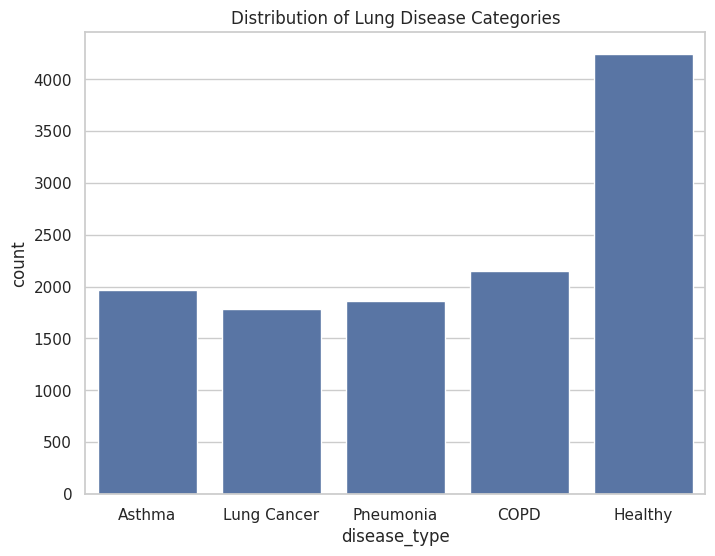

In [4]:
target = 'disease_type'

# Distribution of target
print("\nTarget Distribution:\n", df[target].value_counts(normalize=True))

# Visualize target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=target, data=df)
plt.title('Distribution of Lung Disease Categories')
plt.show()

**Descriptive Statistics for Key Numerical Features**


Descriptive Statistics for Numerical Features:
         patient_id           age           bmi    pack_years  pm25_exposure  \
count  12000.00000  12000.000000  12000.000000  12000.000000   12000.000000   
mean    6000.50000     58.070833     27.008608     14.767758      15.114308   
std     3464.24595     14.741634      4.961936     14.848183       6.689190   
min        1.00000     18.000000     16.000000      0.000000       3.000000   
25%     3000.75000     48.000000     23.500000      2.700000      10.300000   
50%     6000.50000     58.000000     27.000000     10.300000      15.000000   
75%     9000.25000     68.000000     30.400000     22.800000      19.700000   
max    12000.00000     90.000000     45.600000     81.800000      41.300000   

              cough       dyspnea        wheeze    chest_pain         fever  \
count  12000.000000  12000.000000  12000.000000  12000.000000  12000.000000   
mean       0.417333      0.397250      0.246750      0.138083      0.167000   
st

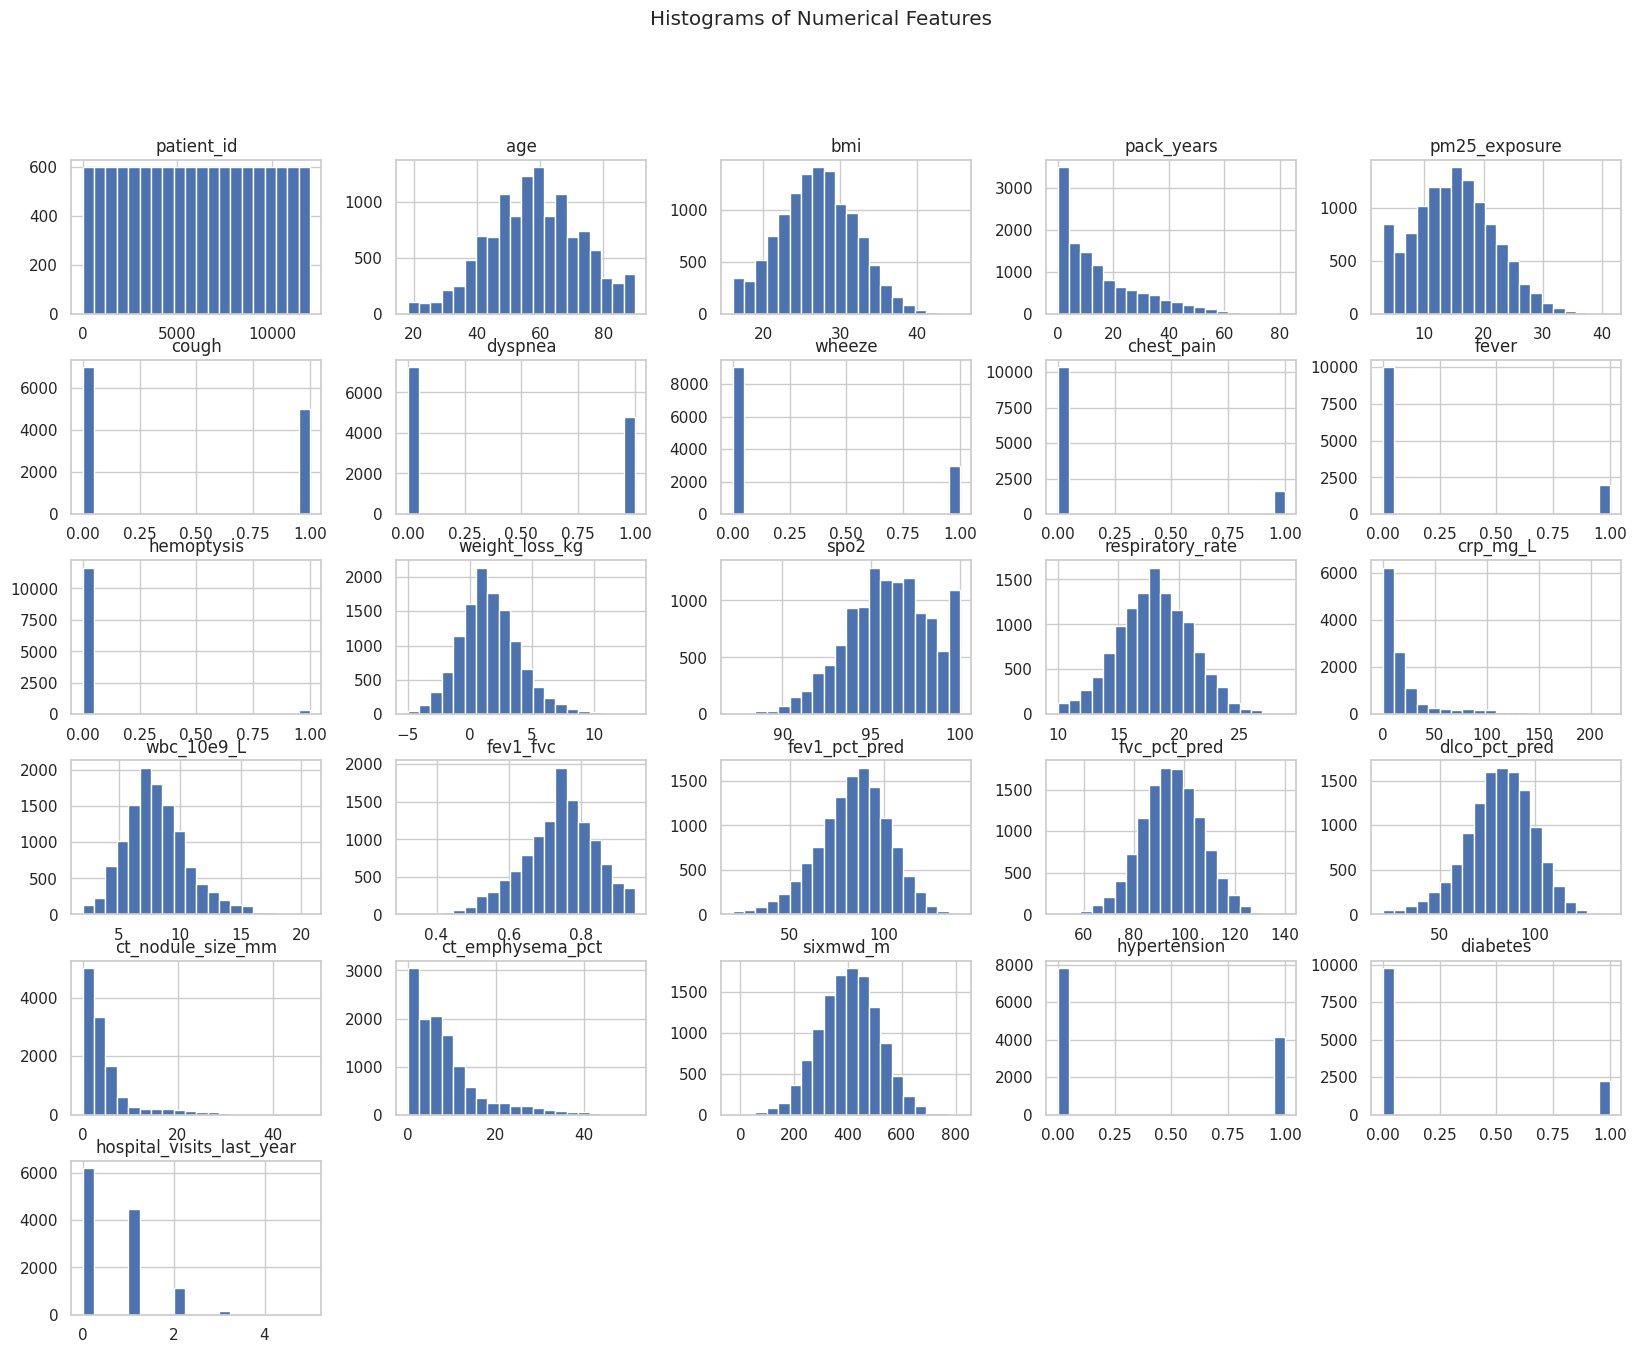

In [5]:
# Identify numerical features (excluding target if numerical)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target in numerical_features:
    numerical_features.remove(target)

print("\nDescriptive Statistics for Numerical Features:\n", df[numerical_features].describe())

# Visualize histograms for numerical features
df[numerical_features].hist(figsize=(20, 15), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

**Visualizations: Trends, Outliers, Skewness**

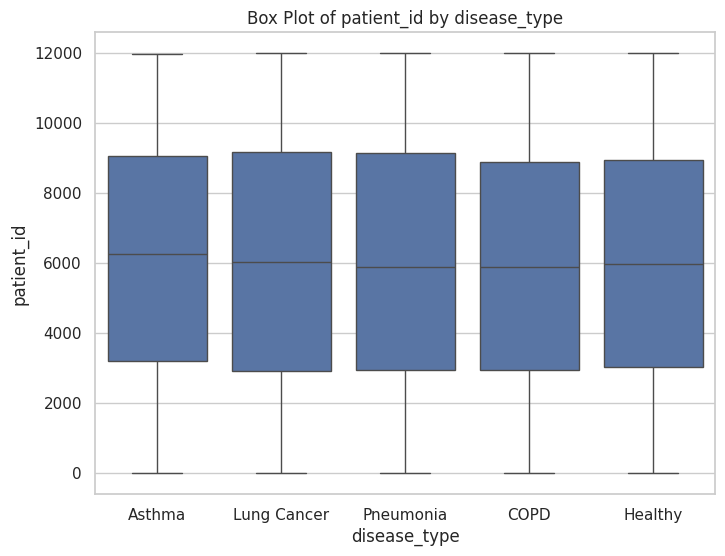

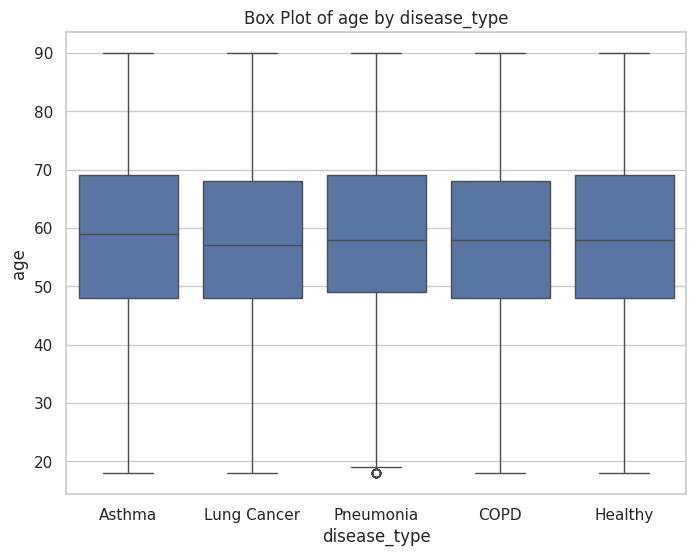

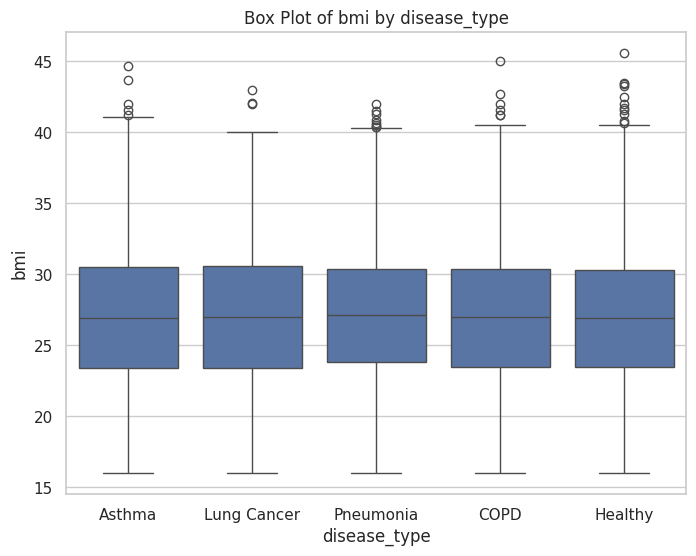

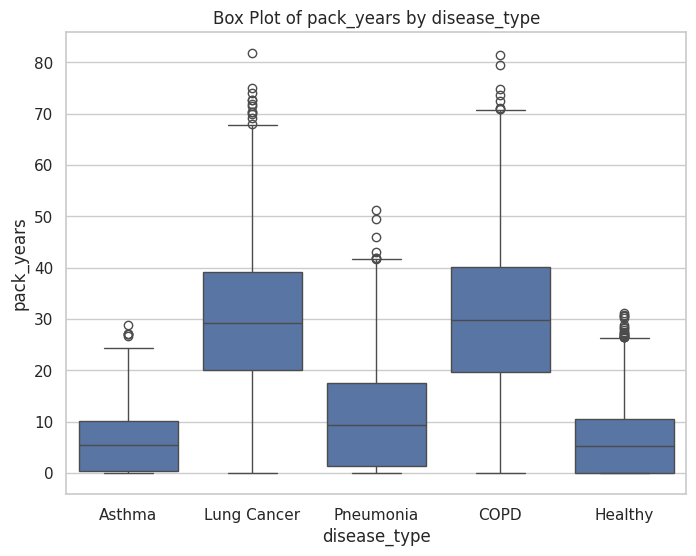

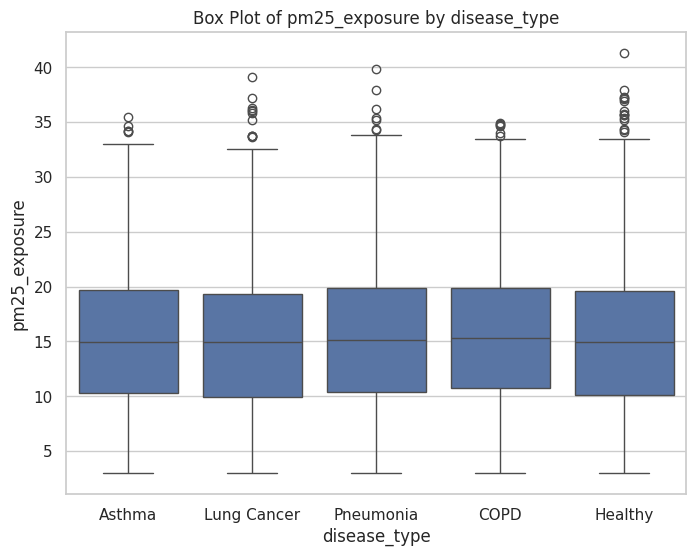

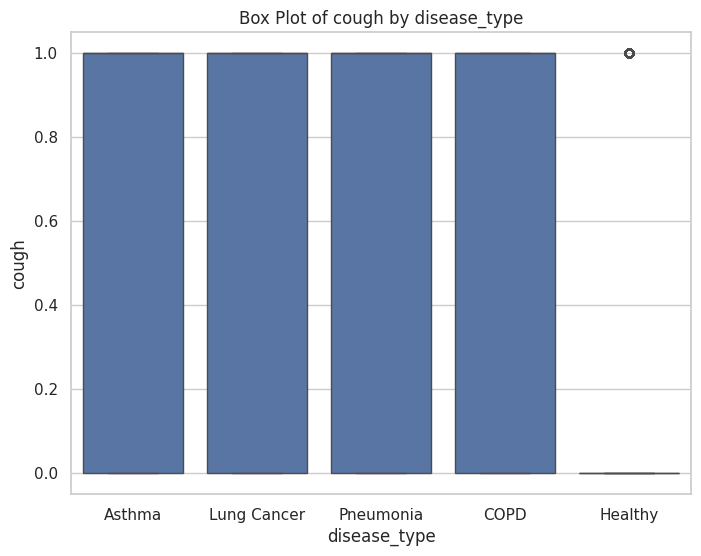

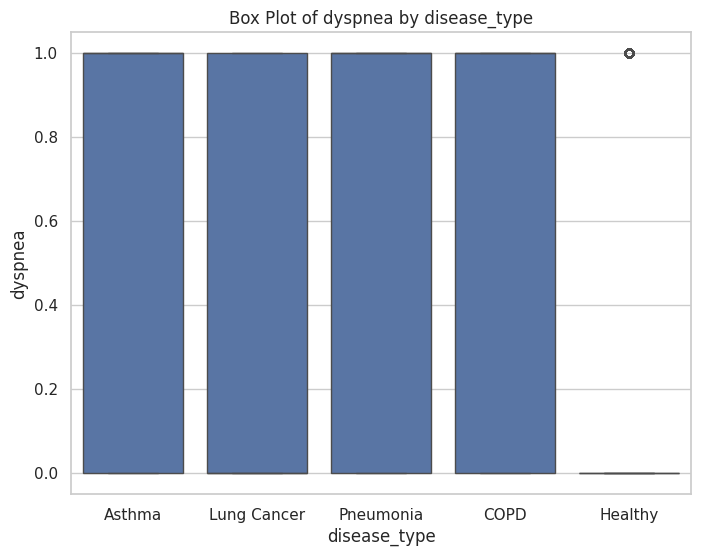

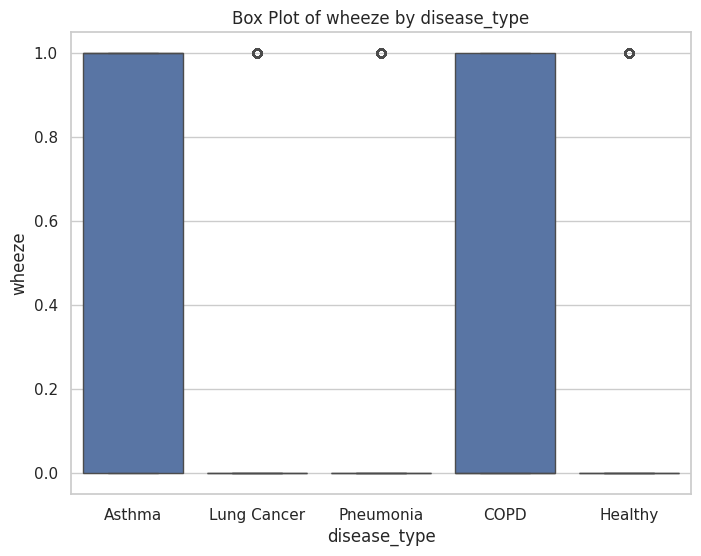

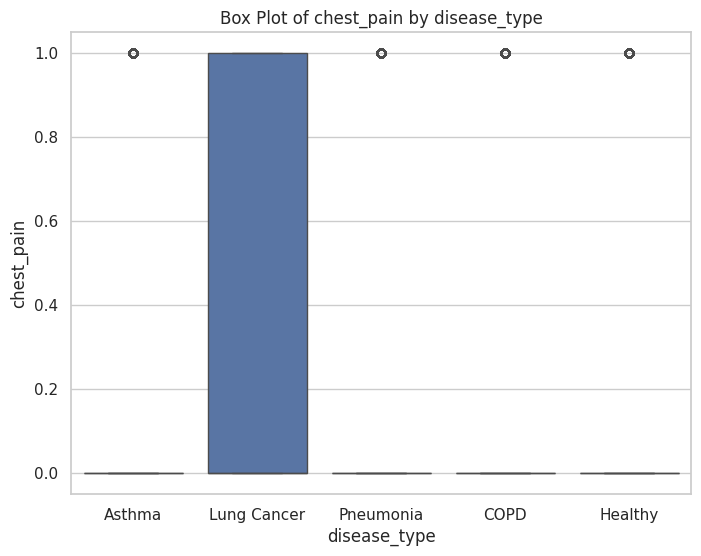

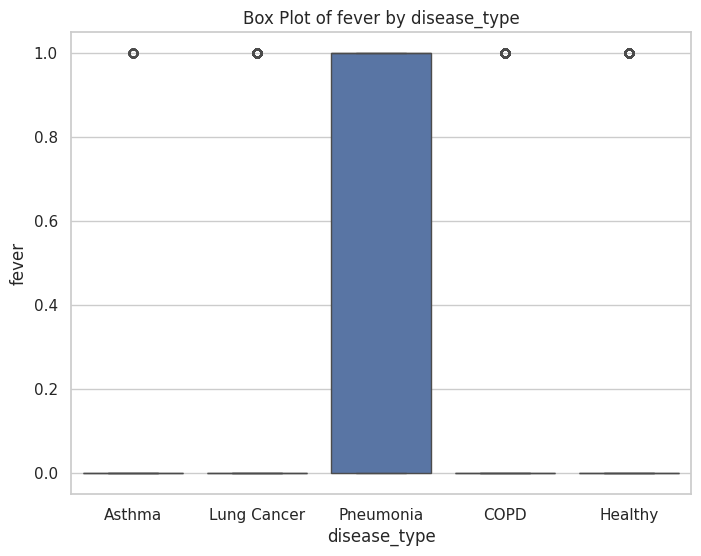

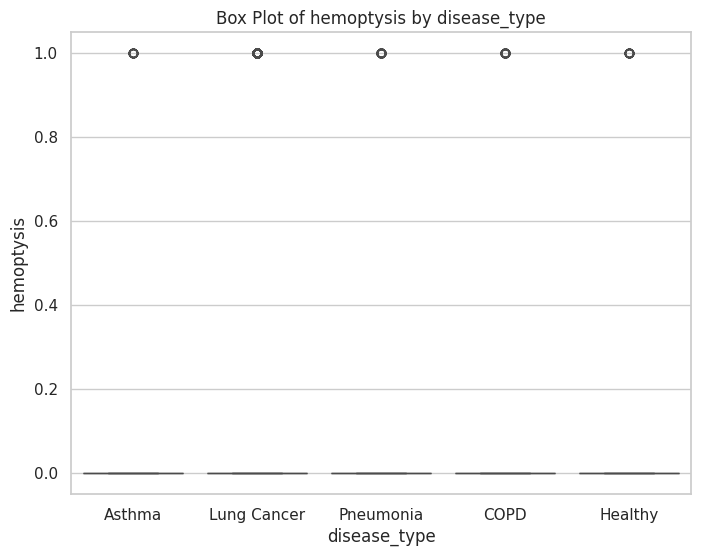

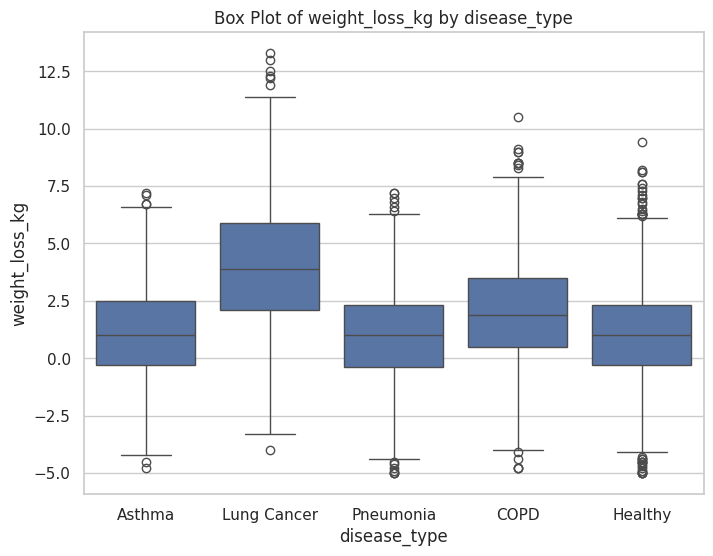

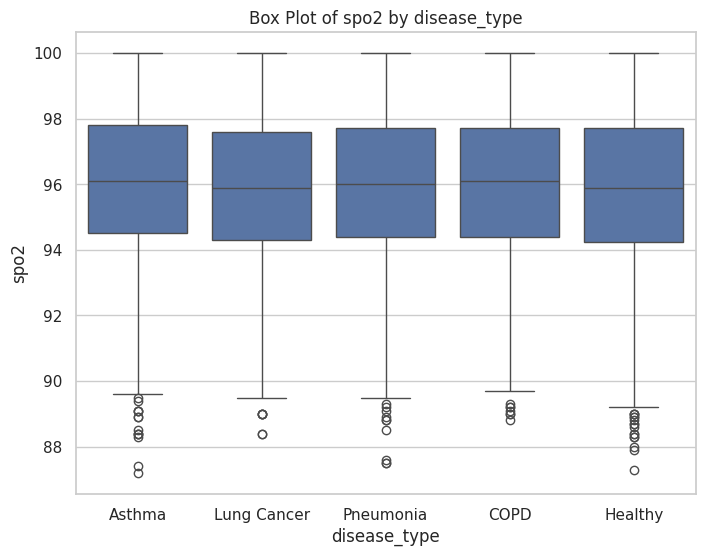

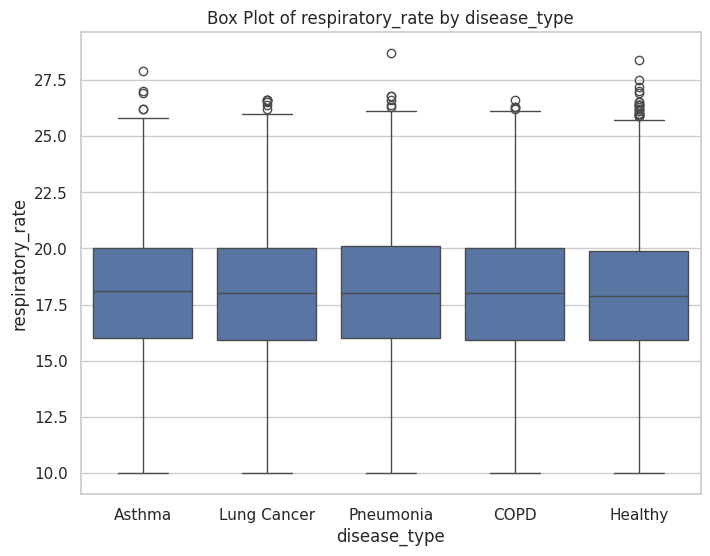

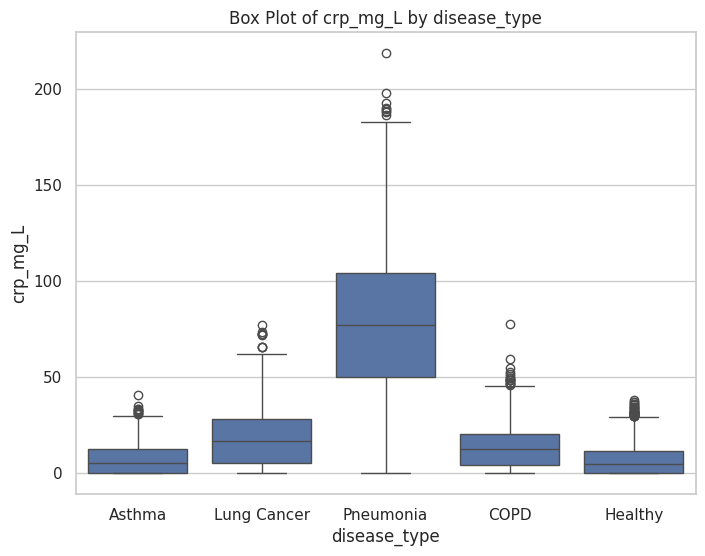

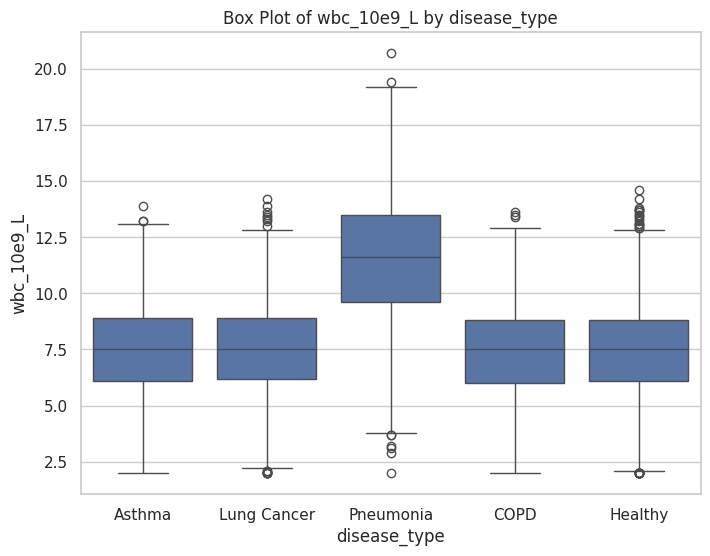

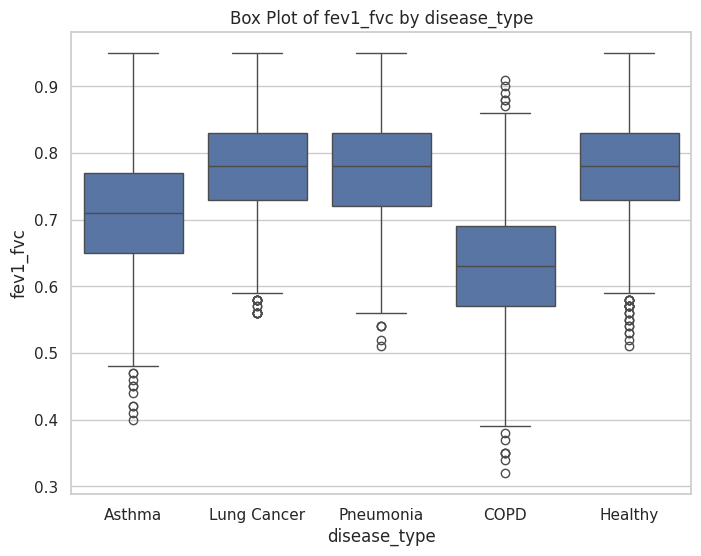

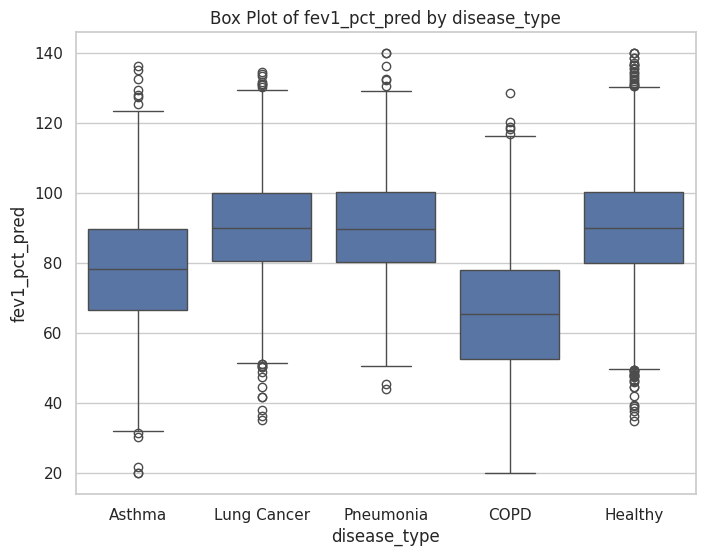

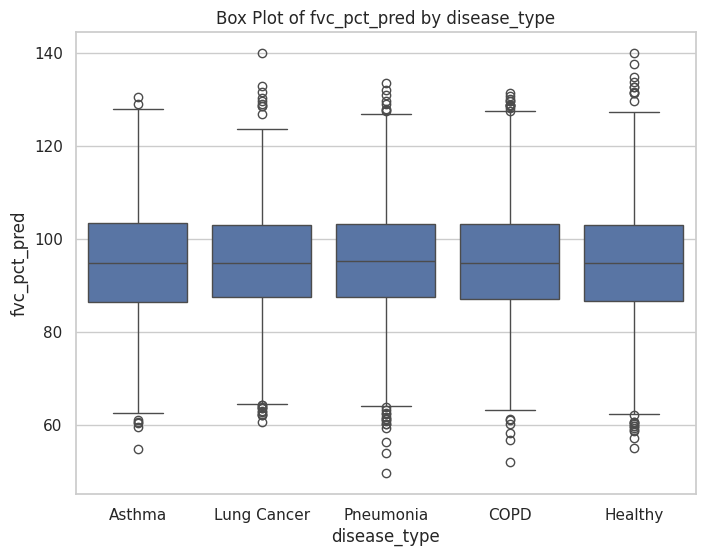

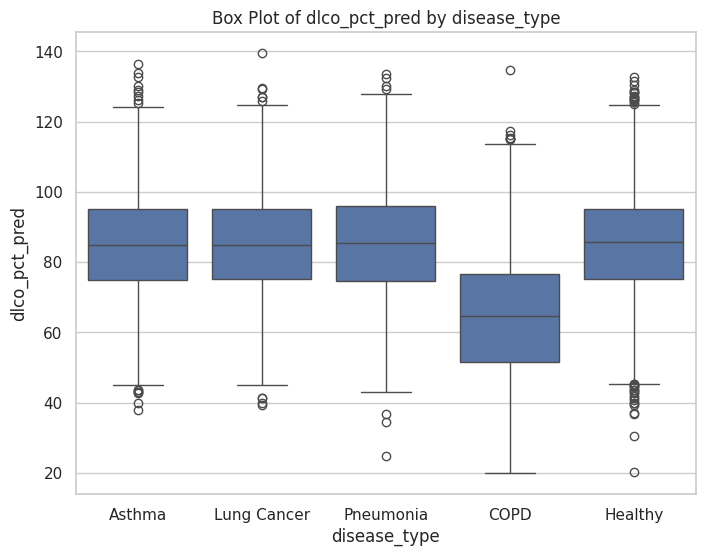

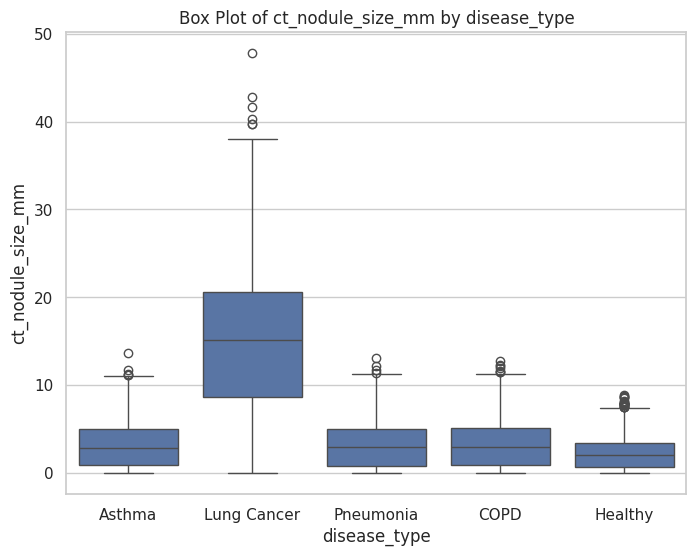

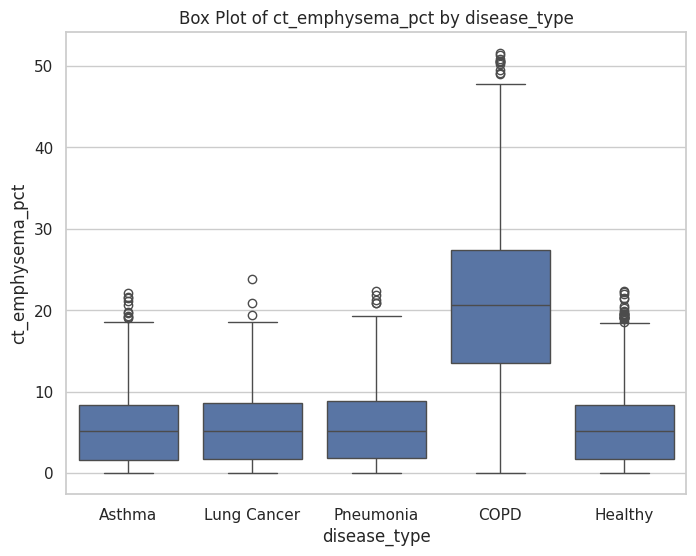

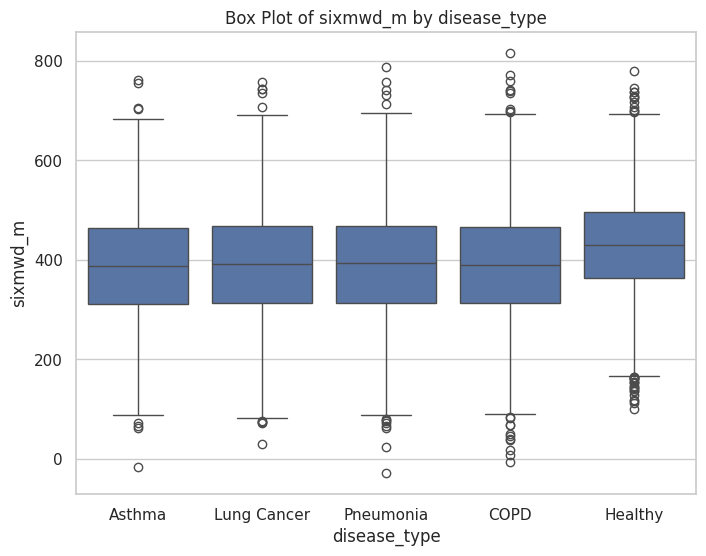

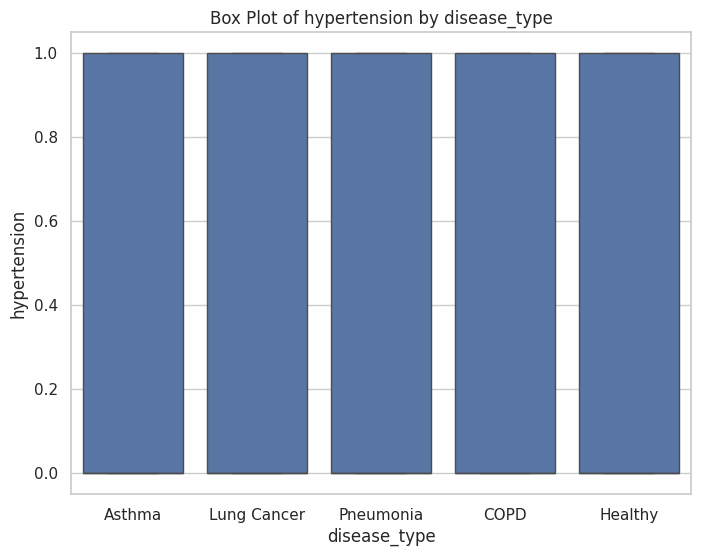

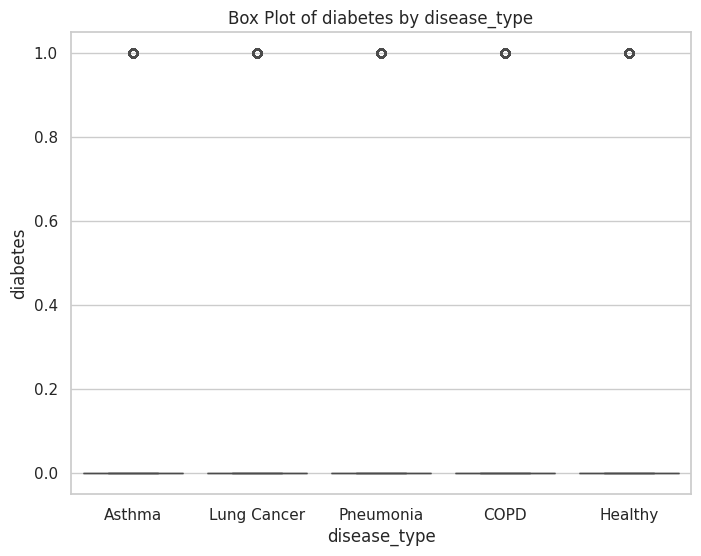

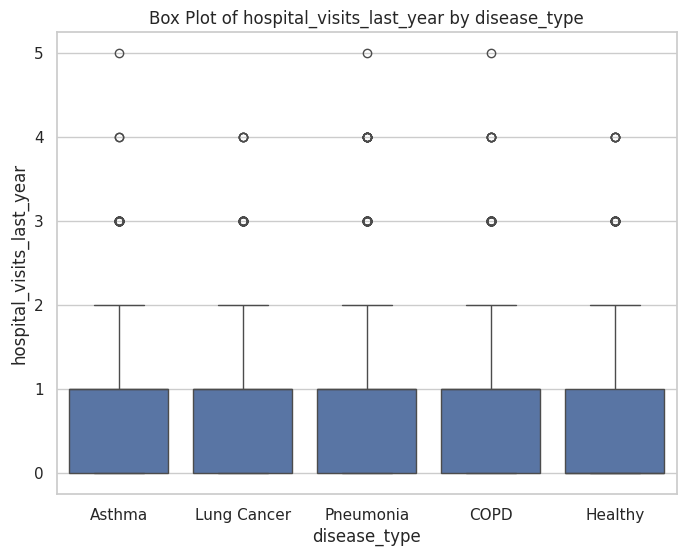


Skewness of Numerical Features:
 patient_id                   0.000000
age                         -0.073984
bmi                          0.080324
pack_years                   1.159309
pm25_exposure                0.219193
cough                        0.335323
dyspnea                      0.420016
wheeze                       1.174994
chest_pain                   2.098406
fever                        1.785862
hemoptysis                   5.713612
weight_loss_kg               0.502260
spo2                        -0.268485
respiratory_rate            -0.001922
crp_mg_L                     2.400825
wbc_10e9_L                   0.693267
fev1_fvc                    -0.401119
fev1_pct_pred               -0.331949
fvc_pct_pred                -0.009289
dlco_pct_pred               -0.359852
ct_nodule_size_mm            2.506387
ct_emphysema_pct             1.747442
sixmwd_m                    -0.057413
hypertension                 0.641371
diabetes                     1.629091
hospital_visits_

In [6]:
# Box plots for numerical features by target
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'Box Plot of {feature} by {target}')
    plt.show()

# Check skewness
print("\nSkewness of Numerical Features:\n", df[numerical_features].skew())

**Correlations and Feature Links**

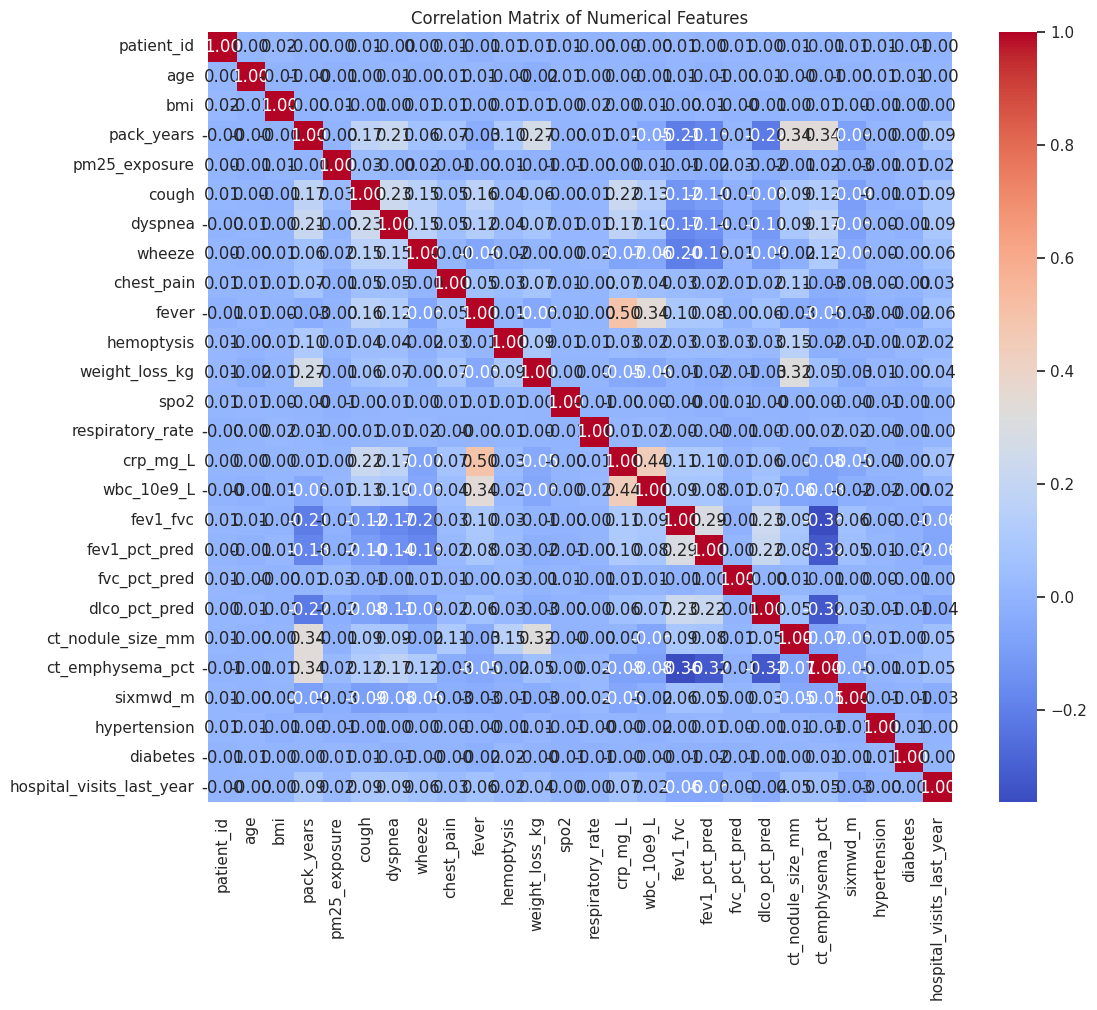


Correlations with Target:
 disease_type                 1.000000
crp_mg_L                     0.592178
fever                        0.453563
wbc_10e9_L                   0.388916
fev1_fvc                     0.372064
fev1_pct_pred                0.338662
ct_nodule_size_mm            0.242620
dlco_pct_pred                0.167489
chest_pain                   0.115503
weight_loss_kg               0.087517
hemoptysis                   0.087409
pack_years                   0.061260
cough                        0.039269
sixmwd_m                     0.007802
bmi                          0.007602
fvc_pct_pred                 0.007260
hypertension                 0.005319
age                          0.001363
respiratory_rate            -0.001271
pm25_exposure               -0.005367
patient_id                  -0.005908
diabetes                    -0.007667
spo2                        -0.008095
hospital_visits_last_year   -0.010857
dyspnea                     -0.014211
ct_emphysema_pct      

In [7]:
# Correlation matrix (for numerical features)
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Correlations with target (if target is encoded)
le = LabelEncoder()
df_encoded = df.copy()
df_encoded[target] = le.fit_transform(df[target])
corr_with_target = df_encoded[numerical_features + [target]].corr()[target].sort_values(ascending=False)
print("\nCorrelations with Target:\n", corr_with_target)

# Identify strongly linked features (absolute corr > 0.5)
strong_links = corr_with_target[abs(corr_with_target) > 0.5].index.tolist()
print("\nFeatures Strongly Linked to Target:", strong_links)

# **Task 2: Data Preparation**

**Identify Missing Values**

In [8]:
# Check missing values
missing = df.isna().sum()
print("\nMissing Values:\n", missing[missing > 0])

# Handling missing values: Impute mean for numerical, mode for categorical
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
if target in categorical_features:
    categorical_features.remove(target)

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_features] = num_imputer.fit_transform(df[numerical_features])
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

# Justification: Mean imputation preserves data distribution for numerical; mode for categorical avoids introducing bias.
print("\nMissing Values After Imputation:\n", df.isna().sum())


Missing Values:
 family_history    7176
dtype: int64

Missing Values After Imputation:
 patient_id                   0
age                          0
sex                          0
bmi                          0
smoking_status               0
pack_years                   0
pm25_exposure                0
occupation                   0
family_history               0
cough                        0
dyspnea                      0
wheeze                       0
chest_pain                   0
fever                        0
hemoptysis                   0
weight_loss_kg               0
spo2                         0
respiratory_rate             0
crp_mg_L                     0
wbc_10e9_L                   0
fev1_fvc                     0
fev1_pct_pred                0
fvc_pct_pred                 0
dlco_pct_pred                0
cxr_finding                  0
ct_nodule_size_mm            0
ct_emphysema_pct             0
sixmwd_m                     0
hypertension                 0
diabetes    

**Encode Categorical Variables**

In [9]:
# One-Hot Encoding for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Ensure we only encode features that are actually in the dataframe
existing_cats = [col for col in categorical_features if col in df.columns]

if existing_cats:
    encoded_data = encoder.fit_transform(df[existing_cats])
    encoded_cats = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(), index=df.index)
    df = pd.concat([df.drop(existing_cats, axis=1), encoded_cats], axis=1)

# Label encode target
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

print("Categorical features encoded and target label-encoded.")
print("\nAfter Encoding (First 5 rows):\n", df.head())

Categorical features encoded and target label-encoded.

After Encoding (First 5 rows):
    patient_id   age   bmi  pack_years  pm25_exposure  cough  dyspnea  wheeze  \
0         1.0  49.0  20.1        21.0           20.8    1.0      0.0     1.0   
1         2.0  61.0  28.4        34.1           10.8    0.0      1.0     0.0   
2         3.0  70.0  22.2        15.7           12.0    1.0      1.0     0.0   
3         4.0  47.0  23.1        49.0           20.0    0.0      1.0     0.0   
4         5.0  70.0  29.0         6.0            6.0    0.0      0.0     0.0   

   chest_pain  fever  ...  cxr_finding_Consolidation  \
0         0.0    0.0  ...                        0.0   
1         0.0    0.0  ...                        0.0   
2         0.0    0.0  ...                        1.0   
3         0.0    0.0  ...                        0.0   
4         0.0    0.0  ...                        0.0   

   cxr_finding_Flattened Diaphragm  cxr_finding_Hyperinflation  \
0                           

**Apply Scaling to Numerical Variables**

In [10]:
# StandardScaler for numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Justification: Scaling ensures features contribute equally to distance-based algorithms like SVM and KNN.
print("\nAfter Scaling (Sample):\n", df[numerical_features].head())


After Scaling (Sample):
    patient_id       age       bmi  pack_years  pm25_exposure     cough  \
0   -1.731906 -0.615346 -1.392379    0.419748       0.850018  1.181595   
1   -1.731618  0.198709  0.280425    1.302048      -0.644994 -0.846314   
2   -1.731329  0.809250 -0.969140    0.062788      -0.465593  1.181595   
3   -1.731040 -0.751022 -0.787751    2.305580       0.730417 -0.846314   
4   -1.730752  0.809250  0.401350   -0.590518      -1.362600 -0.846314   

    dyspnea    wheeze  chest_pain    fever  ...  fev1_fvc  fev1_pct_pred  \
0 -0.811827  1.747193   -0.400256 -0.44775  ... -2.295393      -1.550404   
1  1.231790 -0.572346   -0.400256 -0.44775  ...  0.591143       0.686859   
2  1.231790 -0.572346   -0.400256 -0.44775  ... -0.205143      -0.074876   
3  1.231790 -0.572346   -0.400256 -0.44775  ... -1.300036      -1.113605   
4 -0.811827 -0.572346   -0.400256 -0.44775  ...  1.287892      -1.316024   

   fvc_pct_pred  dlco_pct_pred  ct_nodule_size_mm  ct_emphysema_pct  six

# **Task 3: Model Training**

**Split Dataset**

In [11]:
# Split into features and target
X = df.drop(target, axis=1)
y = df[target]

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Justification: 80/20 is standard for large datasets (12k records); stratify maintains class balance.
print("\nTrain Shape:", X_train.shape, "Test Shape:", X_test.shape)


Train Shape: (9600, 52) Test Shape: (2400, 52)


**Train Multiple Alghorithms**

Justification: Selected algorithms cover linear (LR, SVM), tree-based(DT, RF, GB), and instance-based(KNN) for diversity. Suitable for multi-class classification on mixed data.

In [12]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train with default hyperparameters
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"\n{name} trained with defaults: {model.get_params()}")


Logistic Regression trained with defaults: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Support Vector Machine trained with defaults: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Decision Tree trained with defaults: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

Rando

# **Task 4: Model Evaluation and Visualization**

**Evaluate Models**

In [13]:
# Evaluation metrics
results = []
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    results.append([name, acc, prec, rec, f1])

# Comparative table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print("\nModel Performance:\n", results_df)


Model Performance:
                     Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.944167   0.951202  0.940390  0.945324
1  Support Vector Machine  0.936250   0.945848  0.929649  0.937133
2           Decision Tree  0.891250   0.895290  0.893408  0.893994
3           Random Forest  0.942500   0.952432  0.936834  0.943549
4     K-Nearest Neighbors  0.862917   0.894758  0.837960  0.861108
5       Gradient Boosting  0.937500   0.945357  0.932268  0.938176


**Visual Diagnostics**

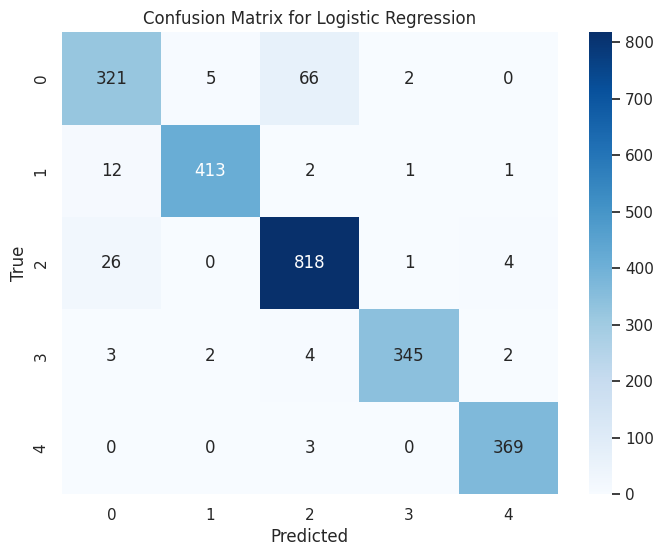

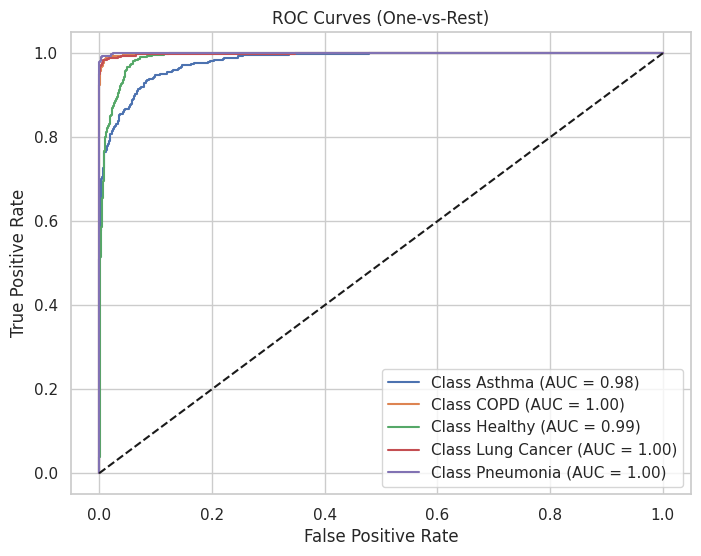

In [14]:
# Confusion Matrix and ROC for each model (example for best, but shown for one)
best_model_name = results_df.loc[results_df['F1-Score'].idxmax(), 'Model']
best_model = trained_models[best_model_name]

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve (multi-class: one-vs-rest)
y_prob = best_model.predict_proba(X_test)
n_classes = len(le.classes_)
fpr_dict, tpr_dict, auc_dict = {}, {}, {}

for i in range(n_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(y_test == i, y_prob[:, i])
    auc_dict[i] = auc(fpr_dict[i], tpr_dict[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_dict[i], tpr_dict[i], label=f'Class {le.classes_[i]} (AUC = {auc_dict[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Hyperparameter Tuning**

In [16]:
# Tune best model
if 'Logistic Regression' in best_model_name:
    # Correcting the param_grid to be compatible with Logistic Regression
    param_grid = {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    }
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    tuned_model = grid_search.best_estimator_
    print("\nBest Params:", grid_search.best_params_)

    # Compare before/after
    y_pred_tuned = tuned_model.predict(X_test)
    print("\nBefore Tuning F1:", f1_score(y_test, y_pred, average='macro'))
    print("After Tuning F1:", f1_score(y_test, y_pred_tuned, average='macro'))


Best Params: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

Before Tuning F1: 0.9453240952812401
After Tuning F1: 0.9453240952812401


**Model Interpretation**

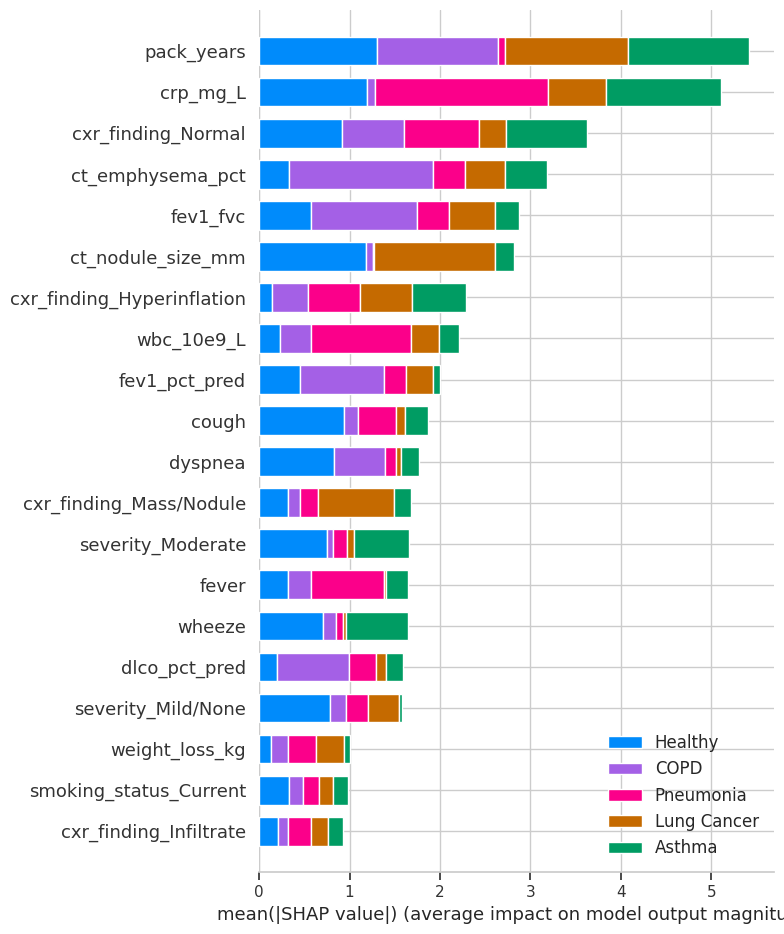

In [19]:
# SHAP for feature importance
# Passing X_test as a DataFrame ensures feature names are preserved
explainer = shap.Explainer(tuned_model if 'tuned_model' in locals() else best_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, class_names=le.classes_)
plt.show()

# LIME interpretation with feature name fix
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=le.classes_,
    mode='classification'
)

# Define a prediction wrapper to keep feature names
def predict_wrapper(data):
    return best_model.predict_proba(pd.DataFrame(data, columns=X_train.columns))

instance = X_test.iloc[0]
# Use the wrapper instead of the raw predict_proba
exp = lime_explainer.explain_instance(instance.values, predict_wrapper)
exp.show_in_notebook(show_table=True)